In [134]:
import pandas as pd

In [135]:
df= pd.read_csv('ImpVinhos.csv', sep=';', )

df.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.0,0.0
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574.0,87519642.0


In [136]:
# Supondo que seu DataFrame seja chamado "df"
# Primeiro, vamos dividir o DataFrame em dois com base no nome das colunas
df_quantidade = df[['Id', 'País'] + [col for col in df.columns if col.isdigit()]]
df_valor_em_reais = df[['Id', 'País'] + [col for col in df.columns if col.endswith('.1')]]

# Usando a função "melt" para transformar as colunas de quantidade em anos em linhas
df_quantidade = pd.melt(df_quantidade, id_vars=['Id', 'País'], var_name='Ano', value_name='Quantidade')

# Usando a função "melt" para transformar as colunas de valor em reais em anos em linhas
df_valor_em_reais = pd.melt(df_valor_em_reais, id_vars=['Id', 'País'], var_name='Ano', value_name='Valor_em_Reais')

# Agora, você terá dois DataFrames, um com as quantidades em quilos e outro com os valores em reais, ambos reestruturados.
# Você pode juntá-los com base nas colunas "Id", "País" e "Ano" se desejar.


In [150]:
df_valor_em_reais.Ano = df_valor_em_reais.Ano.apply(lambda x: str(x).replace(".1", "")).astype(int)

In [191]:
cols = ['País','Ano','Valor_em_Reais']

analise1 = df_valor_em_reais.loc[df_valor_em_reais.Valor_em_Reais >= 1_000_000,cols].groupby(['País','Ano']).sum().sort_values('Ano').reset_index()
analise2 = df_valor_em_reais.loc[df_valor_em_reais.Valor_em_Reais >= 1_000_000,cols].groupby(['País','Ano']).sum().sort_values('Ano').reset_index()

analise1 = analise1[analise1.Ano > 2005]

analise2 = analise2[analise2.Ano < 2005]


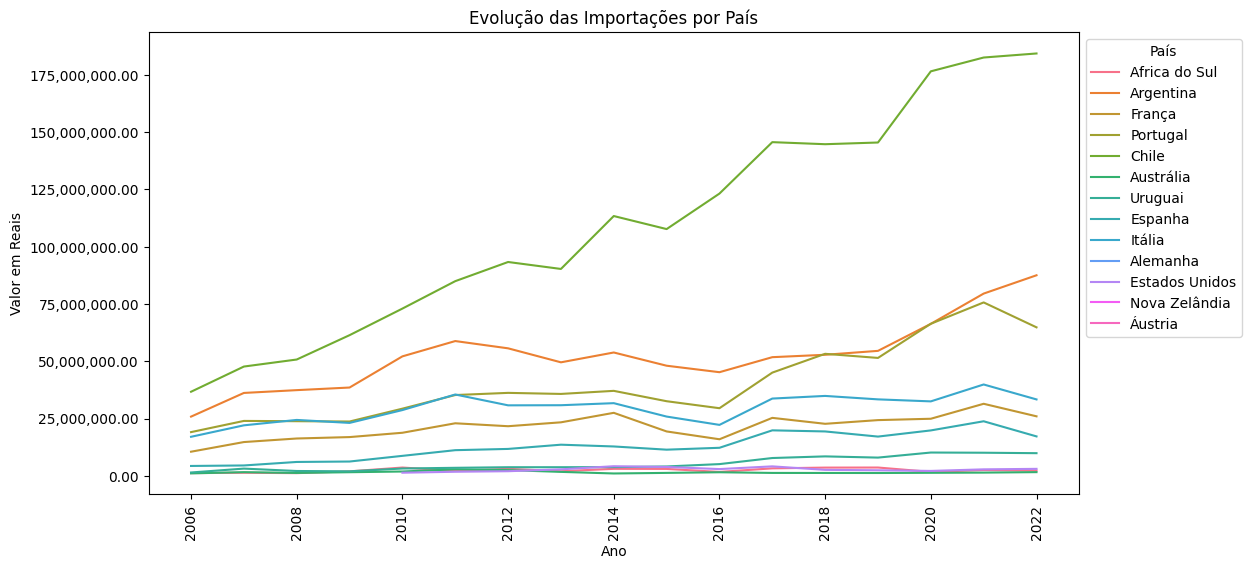

In [180]:
# Use o Seaborn para criar o gráfico de linha
plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico, se necessário

# O argumento "hue" permite separar as linhas com base na coluna "País"
sns.lineplot(data=analise1, x='Ano', y='Valor_em_Reais', hue='País')

# Personalize o gráfico
plt.title('Evolução das Importações por País')
plt.xlabel('Ano')
plt.ylabel('Valor em Reais')

# Formatar valores
formatter = ticker.StrMethodFormatter("{x:,.2f}")
plt.gca().yaxis.set_major_formatter(formatter)


# Exiba o gráfico
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)  # Rótulos do eixo x rotacionados em 90 graus

plt.show()

- 1° Chile é o que mais importa vinho
- 2° Argentina
- 3° Portugal 

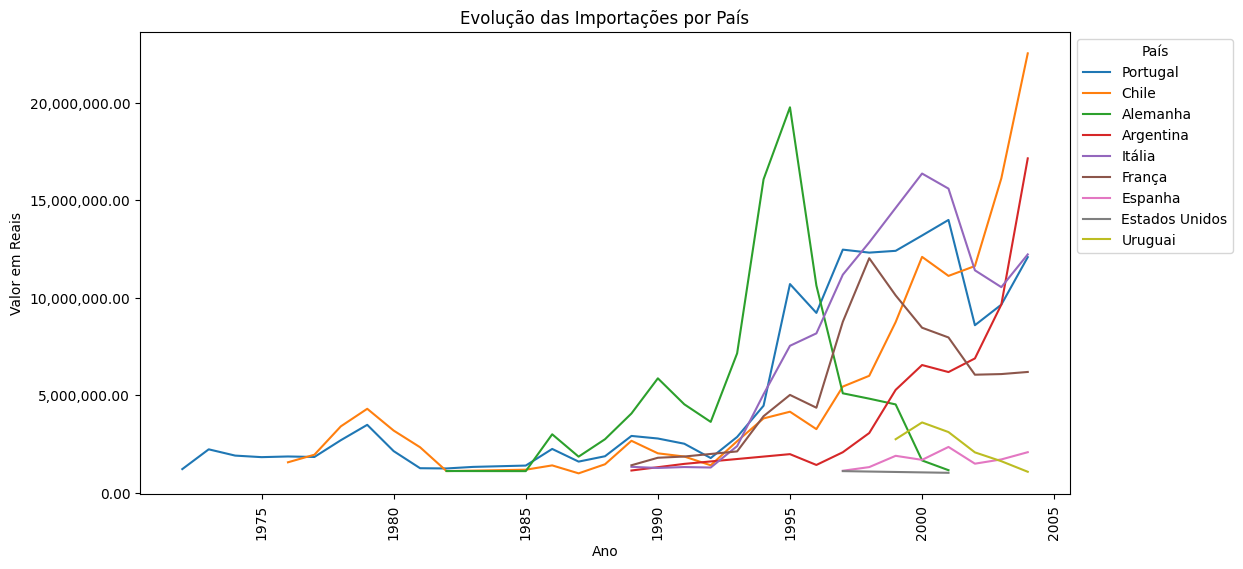

In [181]:
# Use o Seaborn para criar o gráfico de linha
plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico, se necessário

# O argumento "hue" permite separar as linhas com base na coluna "País"
sns.lineplot(data=analise2, x='Ano', y='Valor_em_Reais', hue='País')

# Personalize o gráfico
plt.title('Evolução das Importações por País')
plt.xlabel('Ano')
plt.ylabel('Valor em Reais')

# Formatar valores
formatter = ticker.StrMethodFormatter("{x:,.2f}")
plt.gca().yaxis.set_major_formatter(formatter)


# Exiba o gráfico
plt.legend(title='País', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)  # Rótulos do eixo x rotacionados em 90 graus

plt.show()

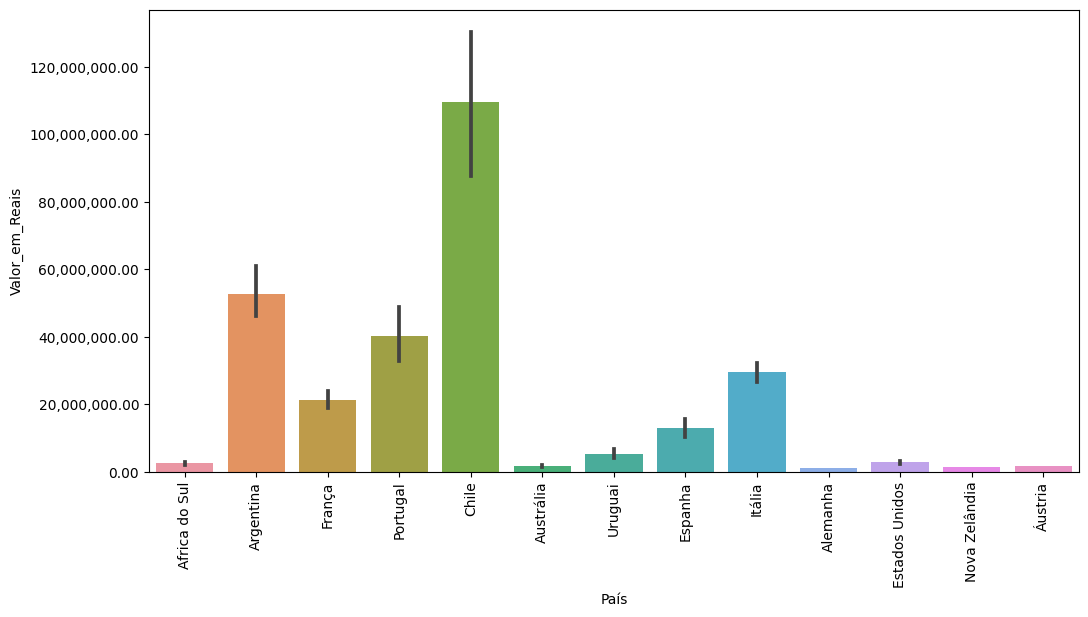

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt


# Use o Seaborn para criar o gráfico de linha
plt.figure(figsize=(12, 6))  # Ajuste o tamanho do gráfico, se necessário

# O argumento "hue" permite separar as linhas com base na coluna "País"
sns.barplot(data=analise1, x='País', y='Valor_em_Reais')


formatter = ticker.StrMethodFormatter("{x:,.2f}")
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)  # Rótulos do eixo x rotacionados em 90 graus

# Exiba o gráfico
plt.show()